## Imports

---



In [ ]:
import numpy as np
from math import log,sqrt,exp
from scipy import stats
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## European Calls - Analytical Solution

---



In [ ]:
def euro_call(S, K, r, sigma, T):
  d1 = (log(S/K)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
  d2 = (log(S/K)+(r-0.5*sigma**2)*T)/(sigma*sqrt(T))
  val = S*stats.norm.cdf(d1,0,1)-K*(exp(-r*T))*stats.norm.cdf(d2, 0,1)
  return val

In [ ]:
S_values = [e for e in range(80,145,5)]
for s in S_values:
  print("For S =",s,",the call value, given by the analytical solution, is:",round(euro_call(s,100,0.05,0.2,1),5))

For S = 80 ,the call value, given by the analytical solution, is: 1.85942
For S = 85 ,the call value, given by the analytical solution, is: 3.2136
For S = 90 ,the call value, given by the analytical solution, is: 5.09122
For S = 95 ,the call value, given by the analytical solution, is: 7.51087
For S = 100 ,the call value, given by the analytical solution, is: 10.45058
For S = 105 ,the call value, given by the analytical solution, is: 13.85791
For S = 110 ,the call value, given by the analytical solution, is: 17.66295
For S = 115 ,the call value, given by the analytical solution, is: 21.79051
For S = 120 ,the call value, given by the analytical solution, is: 26.16904
For S = 125 ,the call value, given by the analytical solution, is: 30.73604
For S = 130 ,the call value, given by the analytical solution, is: 35.44027
For S = 135 ,the call value, given by the analytical solution, is: 40.24176
For S = 140 ,the call value, given by the analytical solution, is: 45.11061


## European Calls - Explicit Scheme

---



In [ ]:
def explicit(K,r,sigma,T,smax,dt,ds):
    
  t = np.arange(0,T+dt,dt)
  s = np.arange(0,smax+ds,ds)

  C=np.zeros((len(t),len(s)))

  for i in range(len(C)):  #C(t,S=0)
    C[i][0] = 0

  for i in range(len(C)): #C(t,Sf)
    C[i][-1] = smax - K*np.exp(-r*(i)*dt)
    
  for i in range(len(C[0])): #C(t=0,S)
    C[0][i] = np.max(((i)*ds-K,0))

  for i in range(1,len(C)):
      for j in range(1,len(C[i])-1):
  
        a = 0.5*dt*(sigma**2*(j)**2-r*(j))
        b = 1-dt*(sigma**2*(j)**2+r)
        c = 0.5*dt*(sigma**2*(j)**2+r*(j))
    
        C[i][j] = a*C[i-1][j-1] + b*C[i-1][j] + c*C[i-1][j+1]

  return C,s,t
    

In [ ]:
%%time

K = 100
r = 0.05
sigma = 0.2
T = 1
smax = 400

dt=0.0001
ds=1

C1,s1,t1 = explicit(K,r,sigma,T,smax,dt,ds)

CPU times: user 10.9 s, sys: 23.3 ms, total: 10.9 s
Wall time: 11 s


In [ ]:
#Calculate call value and accuracy given by the explicit scheme 
S_values = [e for e in range(80,145,5)]
for s in S_values:
  print("For S =",s,",the call value, given by the Explicit scheme, is:",round(C1[-1][s],5))
  print("and the accuracy is:", round(100*(1-np.abs(C1[-1][s]-euro_call(s,100,0.05,0.2,1))/euro_call(s,100,0.05,0.2,1)),2))
  print()

For S = 80 ,the call value, given by the Explicit scheme, is: 1.8585
and the accuracy is: 99.95

For S = 85 ,the call value, given by the Explicit scheme, is: 3.21201
and the accuracy is: 99.95

For S = 90 ,the call value, given by the Explicit scheme, is: 5.08911
and the accuracy is: 99.96

For S = 95 ,the call value, given by the Explicit scheme, is: 7.5085
and the accuracy is: 99.97

For S = 100 ,the call value, given by the Explicit scheme, is: 10.44822
and the accuracy is: 99.98

For S = 105 ,the call value, given by the Explicit scheme, is: 13.85576
and the accuracy is: 99.98

For S = 110 ,the call value, given by the Explicit scheme, is: 17.66116
and the accuracy is: 99.99

For S = 115 ,the call value, given by the Explicit scheme, is: 21.78912
and the accuracy is: 99.99

For S = 120 ,the call value, given by the Explicit scheme, is: 26.16803
and the accuracy is: 100.0

For S = 125 ,the call value, given by the Explicit scheme, is: 30.73535
and the accuracy is: 100.0

For S = 13

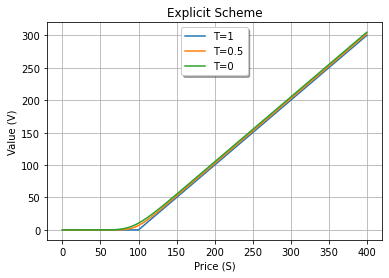

In [ ]:
fig, ax = plt.subplots()
ax.plot(s1, C1[0]) #solution at T=1
ax.plot(s1, C1[5000]) #solution at T=0.5
ax.plot(s1, C1[len(C1)-1]) #solution at T=0
plt.legend(('T=1', 'T=0.5', 'T=0'),
           loc='upper center', shadow=True)
plt.title('Explicit Scheme')
ax.set(xlabel='Price (S)', ylabel='Value (V)')
ax.grid()

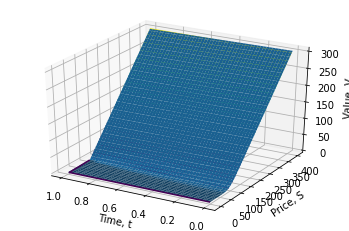

In [ ]:
X, Y = np.meshgrid(t1, s1)
Z = C1.T

X=np.flip(X)

# print(Z.shape,X.shape,Y.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('Time, t')
ax.set_ylabel('Price, S')
ax.set_zlabel('Value, V')
plt.gca().invert_yaxis()

## European Calls -  CN Scheme

---



In [ ]:
def a(j):
    return (1/4)*dt*(sigma**2*(j)**2-r*(j))
def b(j):
  return -(dt/2)*(sigma**2*(j)**2+r)
def c(j):
  return (1/4)*dt*(sigma**2*(j)**2+r*(j))

In [ ]:
def CN(K,r,sigma,T,smax,dt,ds):

  t = np.arange(0,1+dt,dt)
  s = np.arange(0,smax+ds,ds)

  C=np.zeros((len(t),len(s)))


  for i in range(len(C)):
    C[i][0] = 0

  for i in range(len(C)):
    C[i][-1] = smax - K*np.exp(-r*(i)*dt)
    
  for i in range(len(C[0])):
    C[0][i] = np.max(((i)*ds-K,0))


  M = np.zeros((len(s)-2,len(s)-2))
  N = np.zeros((len(s)-2,len(s)-2))


  for i in range(1,len(C)):    
    for j in range(len(M)):
      M[j][j] = 1 - b(j+1)
      
      if j>=0 and j < len(M)-1:
        M[j][j+1] = -c(j+1)

      if j>=1 and j <= len(M)-1:
        M[j][j-1] = -a(j+1)

    for j in range(len(N)):
      N[j][j] = 1 + b(j+1)
      
      if j>=0 and j < len(N)-1:
        N[j][j+1] = c(j+1)

      if j>=1 and j <= len(N)-1:
        N[j][j-1] = a(j+1)

    
    v = np.zeros((len(M[i])))
    v[-1] = C[i][-1]*c(len(s)) + C[i-1][-1]*c(len(s))
    
    C[i][1:-1] = np.linalg.solve(M,N.dot(C[i-1][1:-1])+v)

  return C,s,t

In [ ]:
%%time

#CN
K = 100
r = 0.05
sigma = 0.2
T = 1
smax = 400

dt = 0.01
ds = 0.5

C2,s2,t2 = CN(K,r,sigma,T,smax,dt,ds)

CPU times: user 4.63 s, sys: 2.14 s, total: 6.78 s
Wall time: 3.75 s


In [ ]:

#Calculate call value and accuracy given by the CN scheme 
S_values = [e for e in range(80,145,5)]
for s in S_values:
  print("For S =",s,",the call value, given by the CN scheme, is:",round(C2[-1][s*2],5))
  print("and the accuracy is:", round(100*(1-np.abs(C2[-1][s*2]-euro_call(s,100,0.05,0.2,1))/euro_call(s,100,0.05,0.2,1)),2))
  print()

For S = 80 ,the call value, given by the CN scheme, is: 1.85918
and the accuracy is: 99.99

For S = 85 ,the call value, given by the CN scheme, is: 3.21319
and the accuracy is: 99.99

For S = 90 ,the call value, given by the CN scheme, is: 5.09069
and the accuracy is: 99.99

For S = 95 ,the call value, given by the CN scheme, is: 7.51028
and the accuracy is: 99.99

For S = 100 ,the call value, given by the CN scheme, is: 10.44999
and the accuracy is: 99.99

For S = 105 ,the call value, given by the CN scheme, is: 13.85737
and the accuracy is: 100.0

For S = 110 ,the call value, given by the CN scheme, is: 17.6625
and the accuracy is: 100.0

For S = 115 ,the call value, given by the CN scheme, is: 21.79015
and the accuracy is: 100.0

For S = 120 ,the call value, given by the CN scheme, is: 26.16878
and the accuracy is: 100.0

For S = 125 ,the call value, given by the CN scheme, is: 30.73586
and the accuracy is: 100.0

For S = 130 ,the call value, given by the CN scheme, is: 35.44015
and

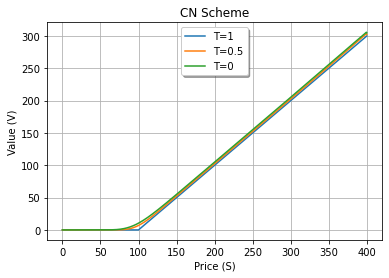

In [ ]:
fig, ax = plt.subplots()
ax.plot(s2, C2[0]) #solution at T=1
ax.plot(s2, C2[50]) #solution at T=0.5
ax.plot(s2, C2[len(C2)-1]) #solution at T=0
plt.legend(('T=1', 'T=0.5', 'T=0'),
           loc='upper center', shadow=True)
plt.title('CN Scheme')
ax.set(xlabel='Price (S)', ylabel='Value (V)')
ax.grid()

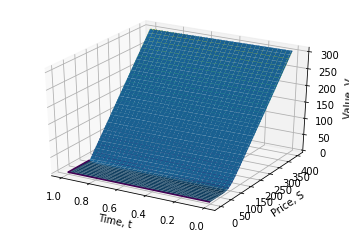

In [ ]:
X, Y = np.meshgrid(t2, s2)
Z = C2.T

X=np.flip(X)

# print(Z.shape,X.shape,Y.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('Time, t')
ax.set_ylabel('Price, S')
ax.set_zlabel('Value, V')
plt.gca().invert_yaxis()

## Call options (**WITH** dividend yield,d) - Explicit scheme

---



In [ ]:
def Call_Option(K,r,sigma,d,T,smax,dt,ds,American):
    
  t = np.arange(0,T+dt,dt)
  s = np.arange(0,smax+ds,ds)

  C=np.zeros((len(t),len(s)))
  
  for i in range(len(C[0])): #C(t=1,S)
    C[0][i] = np.max(((i)*ds-K,0))

  for i in range(len(C)):  #C(t,S=0)
    C[i][0] = 0

  for i in range(len(C)): #C(t,Sf)
    C[i][-1] = smax*np.exp(-d*(i)*dt) - K*np.exp(-r*(i)*dt)
    
  

  for i in range(1,len(C)):
      for j in range(1,len(C[i])-1):
  
        a = 0.5*dt*(sigma**2*(j)**2-(r-d)*(j))
        b = 1-dt*(sigma**2*(j)**2+r)
        c = 0.5*dt*(sigma**2*(j)**2+(r-d)*(j))
    
        C[i][j] = a*C[i-1][j-1] + b*C[i-1][j] + c*C[i-1][j+1]
        if American:
          for j in range(len(C[i])):
            C[i][j] = np.max((C[i][j],C[0][j]))
            if (C[i][j]<C[0][j]):
              print("OLA")
        # print(i)

  return C,s,t

In [ ]:
C4,s4,t4 = Call_Option(100,0.05,0.2,0.05,1,400,0.0001,20,American=False) #European
C5,s5,t5 = Call_Option(100,0.05,0.2,0.05,1,400,0.0001,20,American=True) #American

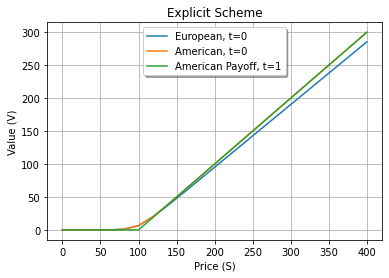

In [ ]:
fig, ax = plt.subplots()
ax.plot(s4, C4[len(C4)-1]) #solution at T=0
ax.plot(s5, C5[len(C5)-1]) #solution at T=0
ax.plot(s5, C5[0]) #solution at T=1
plt.legend(('European, t=0', 'American, t=0', 'American Payoff, t=1'),
           loc='upper center', shadow=True)
plt.title('Explicit Scheme')
ax.set(xlabel='Price (S)', ylabel='Value (V)')
ax.grid()

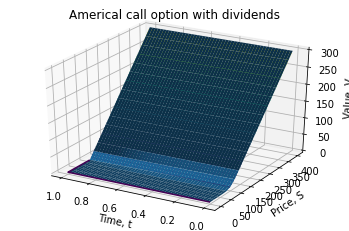

In [ ]:
X, Y = np.meshgrid(t5, s5)
Z = C5.T

X=np.flip(X)

# print(Z.shape,X.shape,Y.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('Time, t')
ax.set_ylabel('Price, S')
ax.set_zlabel('Value, V')
plt.title('Americal call option with dividends')
plt.gca().invert_yaxis()